## **Genetic Algorithm Task**

**Task:** Solving the Traveling Salesman Problem Using Genetic Algorithm

**Description:** Write a Python program that uses a genetic algorithm to solve the Traveling Salesman Problem (TSP) for a small set of cities. The goal is to find the shortest route that visits each city exactly once and returns to the starting city.

**Steps:**
1. Define a set of cities and their coordinates.
2. Generate an initial population of random routes (order of cities).
3. Implement a fitness function to calculate the total distance of a route.
4. Perform selection, crossover, and mutation operations to create a new generation of routes.
5. Repeat the process for a certain number of generations.
6. Identify the best route in the final generation as the solution.

**Optional Extensions:**
- Experiment with different population sizes, mutation rates, and selection methods.


Best Route: ['A', 'B', 'F', 'E', 'G', 'C', 'D']
Total Distance: 26.83241952855483


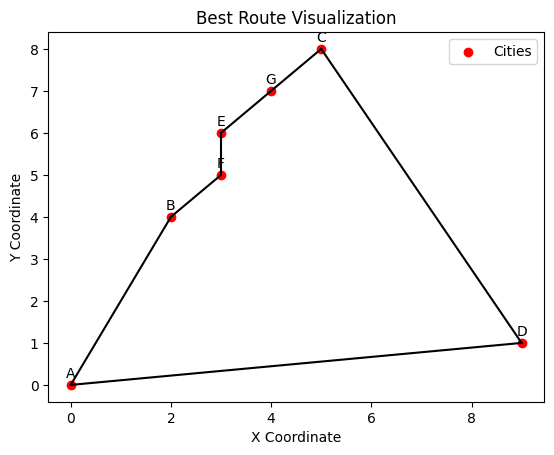

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


def distance(city1, city2):
    """
    Calculates the Euclidean distance between two cities.

    Args:
        city1 (tuple): Coordinates of the first city (x, y).
        city2 (tuple): Coordinates of the second city (x, y).

    Returns:
        float: Euclidean distance between the two cities.
    """
    x1, y1 = city1
    x2, y2 = city2

    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)


def total_distance(route, cities):
    """
    Calculates the total distance of a route that visits cities in order.

    Args:
        route (list): List of city indices in the route.
        cities (list): List of city coordinates.

    Returns:
        float: Total distance of the route.
    """
    total_distance = 0
    for i in range(len(route) - 1):
        city1, city2 = route[i], route[i + 1]

        total_distance += distance(cities[city1], cities[city2])

    total_distance += distance(cities[route[-1]], cities[route[0]])
    return total_distance


def generate_initial_population(size, cities):
    """
    Generates an initial population of random routes.

    Args:
        num_routes (int): Number of routes in the population.
        num_cities (int): Number of cities in the route.

    Returns:
        list: List of random routes (lists of city indices).
    """
    population = []
    for _ in range(size):
        route = list(cities.keys())
        np.random.shuffle(route)
        population.append(route)
    return population


def selection(population, scores):
    """
    Selection of individuals for mating based on fitness scores.
    Args:
        population (list): List of individuals in the current population.
        scores (list): List of fitness scores corresponding to the individuals.
    Returns:
        list: New population consisting of individuals selected for mating.
    """
    scores = np.array(scores)
    p = scores / sum(scores)
    selected_indices = np.random.choice(len(population), size=len(population), p=p)
    return [population[i] for i in selected_indices]


def crossover(parent1, parent2):
    """
    Performs one-point crossover between two parent routes to create two child routes.

    Args:
        parent1 (list): List of city indices in the first parent route.
        parent2 (list): List of city indices in the second parent route.

    Returns:
        child1 (list): List of city indices in the first child route.
        child2 (list): List of city indices in the second child route.
    """
    crossover_point = np.random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + [city for city in parent2 if city not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [city for city in parent1 if city not in parent2[:crossover_point]]
    return child1, child2


def mutate(route, mutation_rate):
    """
    Performs swap mutation on a route by swapping two randomly selected cities.

    Args:
        route (list): List of city indices in the route.

    Returns:
        mutated_route (list): List of city indices in the mutated route.
    """
    if np.random.rand() < mutation_rate:
        idx1, idx2 = np.random.choice(len(route), size=2, replace=False)
        route[idx1], route[idx2] = route[idx2], route[idx1]
    return route


def run_genetic_algorithm(population, population_size, generations, mutation_rate, cities):
    # Run genetic algorithm for a certain number of generations
    for generation in range(generations):

        # Calculate fitness scores for each individual in the population
        scores = [total_distance(route, cities) for route in population]

        # Selection
        selected_population = selection(population, scores)

        # Crossover
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = np.random.choice(len(selected_population), size=2, replace=False)
            parent1, parent2 = selected_population[parent1], selected_population[parent2]

            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        # Update the population with the new generation
        population = new_population

    return population


def visualize_route(cities, best_route):
    # Splitting coordinates into x and y
    x = [cities[city][0] for city in best_route]
    y = [cities[city][1] for city in best_route]

    # Visualization of points
    plt.scatter(x, y, c='red', marker='o', label='Cities')

    # Visualization of the route
    for i in range(len(best_route) - 1):
        plt.plot([cities[best_route[i]][0], cities[best_route[i + 1]][0]],
                 [cities[best_route[i]][1], cities[best_route[i + 1]][1]], 'k-')

    # Зв'язування останньої точки з першою
    # Linking the last point to the first
    plt.plot([cities[best_route[-1]][0], cities[best_route[0]][0]],
             [cities[best_route[-1]][1], cities[best_route[0]][1]], 'k-')

    # Point signatures
    for city, (cx, cy) in cities.items():
        plt.annotate(city, (cx, cy), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.title('Best Route Visualization')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()


def run():
    # Define your list of city coordinates
    CITIES = {'A': (0, 0), 'B': (2, 4), 'C': (5, 8), 'D': (9, 1), 'E': (3, 6), 'F': (3, 5), 'G': (4, 7)}

    # Set parameters
    population_size = 100
    generations = 100
    mutation_rate = 0.1

    # Generate initial population
    population_init = generate_initial_population(population_size, cities=CITIES)

    # Run the genetic algorithm
    population = run_genetic_algorithm(
        population_init,
        population_size,
        generations,
        mutation_rate,
        cities=CITIES)

    # Find the best route in the final generation
    best_route = min(population, key=lambda route: total_distance(route, cities=CITIES))

    # Print the best route and its total distance
    print(f"Best Route: {best_route}")
    print(f"Total Distance: {total_distance(best_route, cities=CITIES)}")
    visualize_route(CITIES, best_route)


if __name__ == "__main__":
    run()


# Оскільки оптимальне рішення випало випадково - то запустимо ще декілька раз

Best Route: ['G', 'C', 'B', 'A', 'D', 'E', 'F']
Total Distance: 30.988052308916537


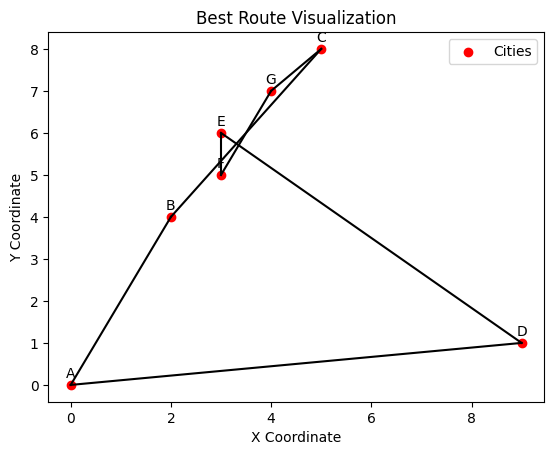

In [ ]:
run()

Best Route: ['F', 'G', 'C', 'E', 'D', 'A', 'B']
Total Distance: 29.230692996035824


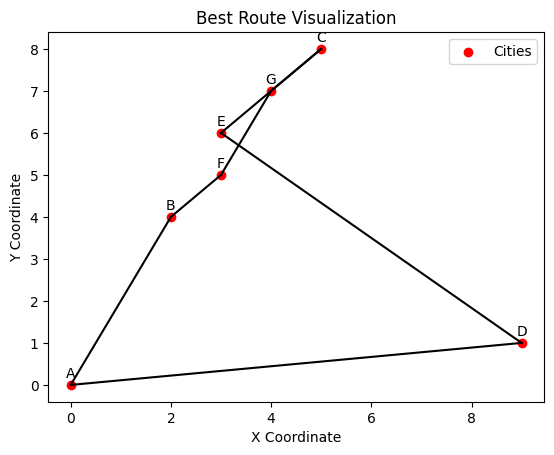

In [ ]:
run()

Best Route: ['E', 'A', 'B', 'F', 'D', 'G', 'C']
Total Distance: 31.858546363825965


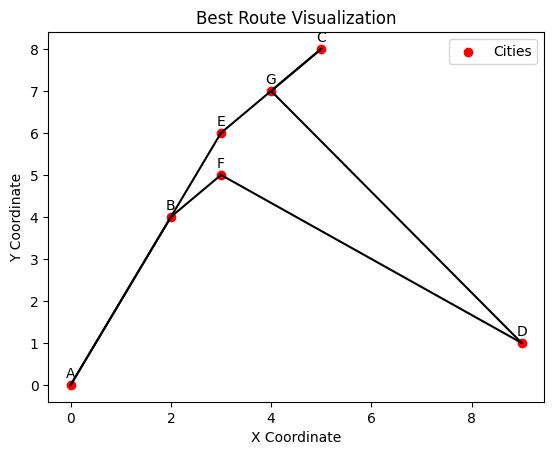

In [ ]:
run()

Best Route: ['D', 'E', 'G', 'C', 'F', 'B', 'A']
Total Distance: 29.18596273162693


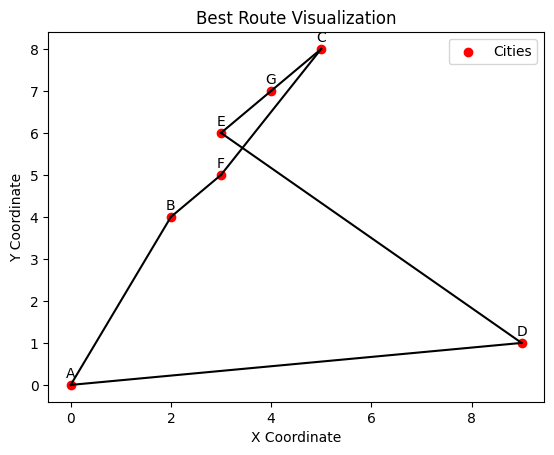

In [ ]:
run()